In [1]:
import pandas as pd
import numpy as np
import os
import math
import shutil
import glob
import tensorflow as tf
import keras

2025-12-17 18:47:53.023697: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-17 18:47:54.416245: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
#ROOT_DIR  = '/home/dhe-reigner/Desktop/breast_cancer/dataset'
ROOT_DIR = '/home/dhe-reigner/Desktop/breast_cancer/dataset/validation'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [3]:
number_of_images

{'benign': 248, 'malignant': 1}

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/training',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    format="tf",
    verbose=True,
)

Found 1488 files belonging to 2 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/validation',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    format="tf",
    verbose=True,
)

Found 496 files belonging to 2 classes.


Building the Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,InputLayer,BatchNormalization,GlobalAvgPool2D
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator 



In [7]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3) ))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))

model.add(Dropout(rate=0.25))

model.add(Dense(units=1, activation='sigmoid'))

model.summary()

/home/dhe-reigner/Desktop/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

In [9]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Early Stopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, mode='auto')

# model check point
mc = ModelCheckpoint(monitor='val_accuracy', filepath='./bestmodel.keras', verbose=1, save_best_only=True, mode='auto')

cd = [es,mc]

In [10]:
model_history = model.fit(x=training_set,
                                    validation_data=validation_set,
                                    steps_per_epoch=10, 
                                    epochs=30,
                                    verbose=True,
                                    validation_steps= 16,
                                    callbacks=cd)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4909 - loss: 214.1529
Epoch 1: val_accuracy improved from None to 0.50000, saving model to ./bestmodel.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.5125 - loss: 121.6008 - val_accuracy: 0.5000 - val_loss: 0.9577
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4917 - loss: 0.9125
Epoch 2: val_accuracy did not improve from 0.50000
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5156 - loss: 0.8215 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5236 - loss: 0.7258
Epoch 3: val_accuracy did not improve from 0.50000
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.5469 - loss: 0.7163 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5101 - loss: 0.6931
Epoch 4: val_accuracy did not improve from 0.50000
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.4906 - loss: 0.6932 - val_

Model Evaluation

In [11]:
h = model_history.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

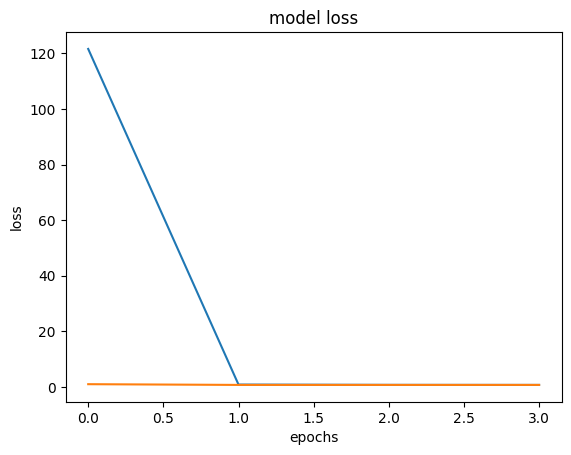

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

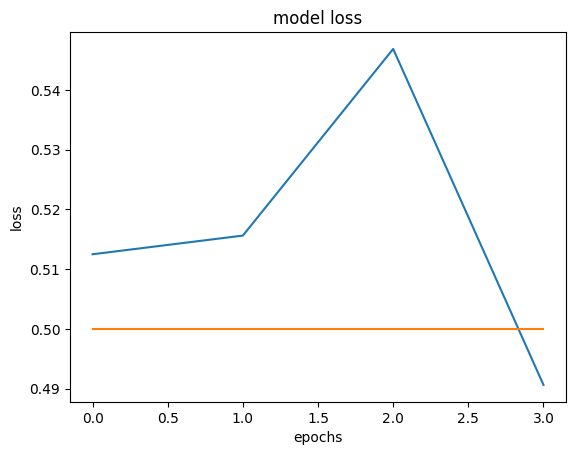

In [13]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [14]:
model.save('model.keras')

In [15]:
from keras.models import load_model

model = load_model('bestmodel.keras')

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score()

TypeError: missing a required argument: 'y_true'

Model Evaluation

In [17]:
train_loss,train_acc = model.evaluate(training_set)

47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 492ms/step - accuracy: 0.5000 - loss: 1.1205


In [18]:
val_loss,val_acc = model.evaluate(validation_set)

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 444ms/step - accuracy: 0.5000 - loss: 0.9577


Model Prediction

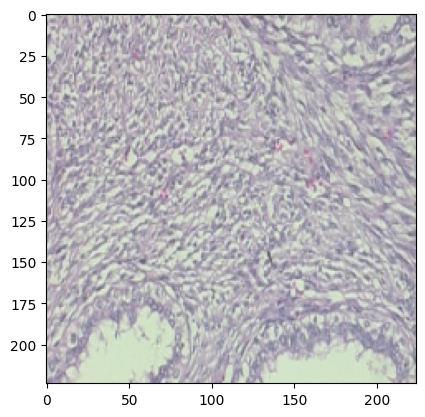

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
The MRI is not having a Tumor


In [19]:
from keras.preprocessing.image import load_img,img_to_array
path = 'dataset/test/benign/benign_1751.png'

img = load_img(path, target_size=(224, 224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict(input_arr)[0][0]

pred

if pred == 'benign':
    print('The MRI is having a Tumor')
else:
    print("The MRI is not having a Tumor")

In [ ]:
training_set.class_names